<a href="https://colab.research.google.com/github/jairantunes/Machine-Learning/blob/master/Supervised_Learning_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Machine Learning - https://bit.ly/2JVEj2W

We will be doing a simple exercise using a well known data collection - Boston area home prices. The problem is to predict home prices based on this data using REGRESSION. 


*Disclaimer: this data is old so some of the information will not properly predict current trends! So current, reliable and relevant data is needed for good ML modeling!

### We will be using these packages to help us
- numpy: Used for NumPy is the fundamental package for scientific computing with Python.

- pandas: pandas is used for data analysis tools for the Python programming

- scipy: SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering

- matplotlib: Matplotlib is a plotting library for the Python programming language

- sklearn: Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language

- statsmodels: statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models

- seaborn: Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

## Loading Packages
Please execute the next cell to load our required packages - note how package names are refernced in short form by the use of _"as"_

In [0]:
get_ipython().run_line_magic('matplotlib', 'inline')

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

### Load Boston dataset

In [0]:
# sklearn provides datasets as part of the package! You don't have to download datasets from other websites. 
from sklearn.datasets import load_boston
boston = load_boston() # load_boston in sklearn already has information about the housing data! 

In [0]:
print(boston.DESCR) # describe the dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
# Let's get some more information about our dataset
print(boston.keys())
print(type(boston.data))
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
<class 'numpy.ndarray'>
(506, 13)


In [0]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [0]:
bos = pd.DataFrame(boston.data) # pandas is used here to format the data into a DataFrame called "bos"- rows and columns 
print(bos.head()) # top 5 rows of dataset bos

        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]


In [0]:
bos.columns = boston.feature_names # we are adding the feature names to the columns
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [0]:
print(boston.target.shape) # target is where we will place the price - it is a single column vector

(506,)


In [0]:
bos['PRICE'] = boston.target # the dependant variable > Price is dependent on the features. 
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]


In [0]:
bos.describe() # get all stats for each column of data quickly !

# this is useful to understand various statistical measures about our data - please review the output below!


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
X = bos.drop('PRICE', axis = 1) # these are our variables
Y = bos['PRICE'] # this is the result

In [0]:
import sklearn.model_selection




### Split the data into training and test set using the train_test_split function

Why do we split the data ? 

The data is split into training (this has the known output based on the data)  and test datasets. As this i duperised learning the "training data" helps the model learn. To validate this learning we use the "test data" which also was part of the original
data so it has the output - making it possible for us to verify the model! 

The command in the cell below uses a sklearn function "train_test_split" using the input data (X,Y) and creates a 2/3 (training) - 1/3 (test)  split of data using the test_size parameter (=0.33). 

Please note there are several ways to split data and that depends on the particular problem to be solved.


In [0]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(339, 13)
(167, 13)
(339,)
(167,)


### Linear Regression
Build the model and predict the target value using the Linear Regression model

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog).

In [0]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

Let's plot the predicted prices vs actual prices along with the ideal prediction

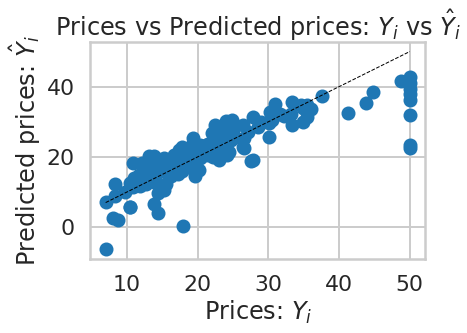

In [0]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=1)

### Mean Squared Error - from the linear regression model

We use loss functions to improve our model. This implies that our effort is minimize the "loss" or "error" between predicted and actual results. 

Mean Squared Error (MSE) is the most common regression loss function. MSE is the sum of squared distances between the target variable and predicted values.


In [0]:
# calculate the MSE between the target values
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

28.530458765974597


### Let's see how another model performs - this is the RandomForestRegressor model 

This model uses decision trees in a regressor model.

Article https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


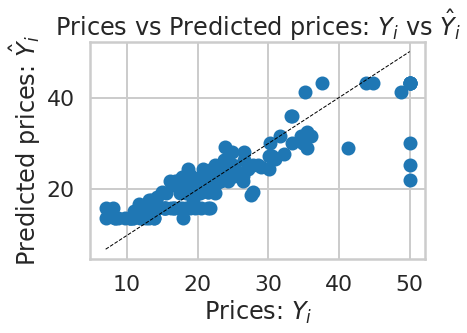

In [0]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, Y_train)

Y_pred = regr.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=1)

### Mean Squared Error - from the Random Forest regression model

In [0]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

23.449404297745122


In [0]:
prices=boston.target

In [0]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Predicting 

### Did you compare the MSEs between the 2 models ? One using liner regression and the other using random forest ??


Now that we have a model **regr** let's see how it does on predictions...

Everything being the same - how do you think the price will be affected by
        * the number of rooms (RM)
        * the Pupil Teacher Ration (PTRATIO) and
        * the level of poverty of people in the neighborhood (LSTAT) ?
       


Here we have 3 homes with these characteristics :

    
| Client | Rooms (RM) | PTRATIO | LSTAT 
| ------|-----|---------|----------
|   1   |    5       |   15    |   20 
|   2   |      4      |   30    |   10  |
 |   3   |    8       |   12    |   3   |
   
   
   -----------------------------------------
  
  
   Let's see how our model predicts prices for these homes. You may want to guess if the prices would be higher/lower than the median values..     
   

In [0]:
# This is a simple test dataset that is in the same format as our original dataset

clients = [[0.06905, 0.00, 2.18, 0, 0.469, 5.0,61.1,4.0900, 1.0, 296.0, 15.00, 332.09, 20],
               [0.06905, 0.00, 2.18, 0, 0.469, 4.0,61.1,4.0900, 1.0, 296.0, 30.00, 332.09, 10],
               [0.06905, 0.00, 2.18, 0, 0.469, 8.0,61.1,4.0900, 1.0, 296.0, 12.00, 332.09, 3]]


In [0]:
# Let's use the "regr" model and predict prices for each of the clients

for i, price in enumerate(regr.predict(clients)):
    print ("Predicted price for client {}'s home ${:,.2f} ".format(i+1,price))


Predicted price for client 1's home $16.07 
Predicted price for client 2's home $21.73 
Predicted price for client 3's home $43.25 


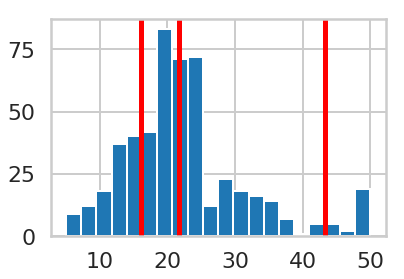

In [0]:
plt.hist(prices,bins=20)
for price in regr.predict(clients):
    plt.axvline(price, lw=5, c='r')

In [0]:
print ("Min Price ",prices.min())
print ("Max Price ", prices.max())
print ("Mean Price ", prices.mean())
print ("Median Price ", np.median(prices))
print (" Prices - Standard Deviation ", np.std(prices))

Min Price  5.0
Max Price  50.0
Mean Price  22.532806324110677
Median Price  21.2
 Prices - Standard Deviation  9.188011545278203


### Visualizing the data we see that 

* Client 1 is below the median (5 rooms, 15 to 1 PT ratio and 20% lower income)
* Client 2 is closer to the median (4 rooms, 30 to 1 PT ratio and 10% lower income) and
* Client 3 is closer to the max (8 rooms, 12 to 1 PT ratio and 3% lower income) 
    
Was your intuition similar ? :)




## In Conclusion

We used Regression to fit data during the training of the model, we tested the model using test data and we tried using the model to predict some fictional homes. 

We used several packages in this process. 

This is a taste of what ML can do .. there are many resources on the Net so please have fun exploring them!
Thank you!